# Notes

This assignment is devoted to `pandas`. It covers indexing and filtering, and some `groupby` and `join` operations. The assignment roughly corresponds to Week 4 and the beginning of Week 5 of the course.

The main dataset you'll be using is [Titanic](https://www.kaggle.com/c/titanic).

In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.rcParams["figure.figsize"] = (6,6)

In [3]:
import numpy as np
import pandas as pd

In [4]:
STUDENT = "Tomer Koren"
ASSIGNMENT = 4
TEST = False

In [5]:
if not TEST:
    titanic_train = pd.read_csv("data/train.csv", index_col="PassengerId")
    titanic_test = pd.read_csv("data/test.csv", index_col="PassengerId")
    titanic = pd.concat([titanic_train, titanic_test], sort=False)

In [6]:
if TEST:
    import solutions
    total_grade = 0
    MAX_POINTS = 16

# Indexing and filtering

### 1. Fixing age (1 point).

There are several known mistakes in the Titanic dataset.

Namely, [Julia Florence Siegel](https://www.encyclopedia-titanica.org/titanic-survivor/julia-florence-cavendish.html) (Mrs. Tyrell William Cavendish) is mistakenly marked as being 76 years old (the age she actually died, but many years after Titanic).

You must replace age value for her with her actual age at the time (25) and return the dataset. Input is indexed with `PassengerId` and is a concatenation of train and test sets. You must return a copy of the dataframe, and not perform replacement in original dataframe. Structure and indexing must be the same as in input.

In [7]:
def fix_age(df):
    """Fix age for Julia Florence Siegel."""
    df_copy = df.copy()
    julia_mask = df.Name.str.contains("Julia Florence Siegel")
    df_copy.loc[julia_mask,'Age'] = 25
    return df_copy

In [8]:
if not TEST:    
    julia_mask = titanic['Name'].str.contains("Julia Florence Siegel")
    print('Before fix_age (original df) : ',titanic.loc[julia_mask,'Age'].iat[0])
    titanic_fix = fix_age(titanic)    
    print('After fix_age (original df) : ',titanic.loc[julia_mask,'Age'].iat[0])
    print('After fix_age (returned df) : ',titanic_fix.loc[julia_mask,'Age'].iat[0])        

Before fix_age (original df) :  76.0
After fix_age (original df) :  76.0
After fix_age (returned df) :  25.0


In [9]:
PROBLEM_ID = 1

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, fix_age)

### 2. Embarkment port distribution (1 point).

You must find the value counts for embarkment port (`Embarked` column) for the passengers, who travelled in 3-d class, were male and between 20 and 30 years old (both inclusive). No need to treat missing values separately.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. You must return series, indexed with values from `Embarked`, according to `.value_counts()` method semantics.

In [10]:
def embarked_stats(df):
    """Calculate embarkment port statistics."""
    class_3_mask = (df.Pclass == 3)
    male_mask = (df.Sex == 'male')
    age_20_30_mask = (df.Age >= 20) & (df.Age <= 30)    
    return df.loc[class_3_mask & age_20_30_mask & male_mask,'Embarked'].value_counts()

In [11]:
if not TEST:
    res = embarked_stats(titanic)
    print(type(res))
    print(res)

<class 'pandas.core.series.Series'>
S    132
C     21
Q      7
Name: Embarked, dtype: int64


In [12]:
PROBLEM_ID = 2

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, embarked_stats)

### 3. Fill missing age values (1 point).

Some age values are missing in the Titanic dataset. You need to calculate average age, and fill missing age values in `Age` column.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a **new** dataframe with the same structure, but without missing values in `Age` column.

In [13]:
def fix_age(df):
    """Fix missing age values."""
    df_copy = df.copy()
    mean_age = df.loc[pd.notna(df.Age),'Age'].mean()
    df_copy['Age'].fillna(mean_age, inplace = True) 
    return df_copy

In [14]:
if not TEST:
    titanic_age_fix = fix_age(titanic)
    print('Original dataset PassengerId-6 Age :', titanic.loc[6,'Age'])
    print('Fixed dataset PassengerId-6 Age :', titanic_age_fix.loc[6,'Age'])
    

Original dataset PassengerId-6 Age : nan
Fixed dataset PassengerId-6 Age : 29.881137667304014


In [15]:
PROBLEM_ID = 3

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, fix_age)

### 4. Child travelling alone (1 point).

You must find a child (`Age<10`) on-board, who was travelling without siblings or parents and find a name of her nursemaid.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a tuple of two strings, collected from `Name` column, with one being child's name and second being nursemaid's name. It's known, that there's only one child like this.

In [16]:
def get_nursemaid(df):
    lonely_child_name = df.loc[(df.Age < 10) & (df.Parch == 0) & (df.SibSp == 0),'Name'].iat[0]
    return tuple([name.strip() for name in lonely_child_name.split(',')])

In [17]:
if not TEST:
    print(get_nursemaid(titanic))

('Emanuel', 'Miss. Virginia Ethel')


In [18]:
PROBLEM_ID = 4

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, get_nursemaid)

### 5. Port with the most children embarked (1 point).

You must find, which port had the largest percentage of children (`Age<10`) embarked, i.e. number of children divided by total number of passengers embarked.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a single string with port letter.

In [19]:
def get_port(df):
    """Get port with the most children embarked."""    
    children_percentage_port = df.loc[df.Age < 10,'Embarked'].value_counts() / len(df)
    return children_percentage_port.idxmax()

In [20]:
if not TEST:
    print('Distribution of children per port : \n',titanic.loc[titanic['Age'] < 10,'Embarked'].value_counts() / len(titanic))
    print('Get_Port result : ',get_port(titanic))

Distribution of children per port : 
 S    0.048892
C    0.010695
Q    0.003056
Name: Embarked, dtype: float64
Get_Port result :  S


In [21]:
PROBLEM_ID = 5

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, get_port)

### 6. Passengers per ticket (2 points).

Calculate average and maximum number of passengers per ticket.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a tuple of two values.

In [22]:
def get_ticket_stats(df):
    """Calculate passenger per ticket statistics."""
    passengers_per_ticket_distribution = df.Ticket.value_counts()
    return tuple([passengers_per_ticket_distribution.mean(),passengers_per_ticket_distribution.max()])

Statistics Result:  (1.4090419806243273, 11)


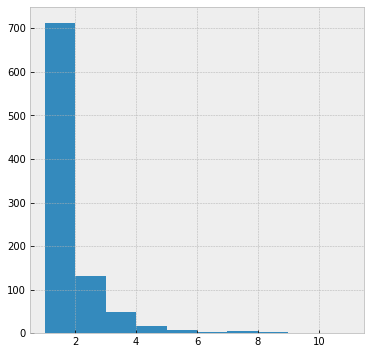

In [23]:
if not TEST:
    print('Statistics Result: ',get_ticket_stats(titanic))
    import matplotlib.pyplot as plt
    plt.hist(titanic['Ticket'].value_counts().values)
    

In [24]:
PROBLEM_ID = 6

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, get_ticket_stats)

### 7. Fare per passenger (3 points).

For each individual ticket, you must calculate fare per person for that ticket, and then calculate averages for each class. Note, that you will need to apply `groupby` and then you may consider using `.first()` of resulting `DataFrameGroupBy`.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be `Series` with three elements, indexed by class.

In [25]:
def get_fare_per_pass(df):
    """Calculate fare per passenger for different classes."""
    ticket_groups = df.groupby('Ticket')    
    unique_pclass_fare_df = ticket_groups['Pclass','Fare'].first()    
    avg_fare_per_pclass_df = unique_pclass_fare_df.groupby('Pclass').mean()    
    return avg_fare_per_pclass_df.Fare

In [26]:
if not TEST:
    res = get_fare_per_pass(titanic)
    print('Returned Type :\n ',type(res))
    print('Returned Value :\n ', res)


Returned Type :
  <class 'pandas.core.series.Series'>
Returned Value :
  Pclass
1    58.261126
2    16.462759
3     9.468468
Name: Fare, dtype: float64


In [27]:
PROBLEM_ID = 7

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, get_fare_per_pass)

### 8. Fill missing age values (3 points).

In problem 3 you filled missing age values with average for all passengers. Now, you need to fill them according to class and sex. For example, for a female passenger from 2d class, missing age value must be filled with average age of females in 2d class.

In this problem, you may need joins and `.apply()`, although there are several ways to get the same result.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be a **new** dataframe with the same structure as input, but without missing values in `Age` column.

In [28]:
def fix_age_groupped(df):
    """Fill missing age values."""
    df = titanic.copy()
    valid_age = df[pd.notnull(df.Age)]
    valid_age_groups = valid_age.groupby(['Pclass','Sex'])
    mean_age_groups_df = valid_age_groups[['Age']].mean()
    mean_age_groups_df.rename(columns={"Age": "Avg_Age"},inplace = True)        
    df_with_avg_age = df.merge(mean_age_groups_df,on=['Pclass','Sex'],right_index=True)    
    df['Age'] = df_with_avg_age.apply(lambda x: x.Avg_Age if pd.isnull(x.Age) else x.Age,axis = 1)    
    return df

In [29]:
if not TEST:
    df_with_fixed_age  = fix_age_groupped(titanic)
    print('Before Fix - Passanger Id 6 Age : ',titanic.loc[6,'Age'])    
    print('After Fix - Passanger Id 6 Age : ',df_with_fixed_age.loc[6,'Age'])
    print('Before Fix - Passanger Id 18 Age : ',titanic.loc[18,'Age'])    
    print('After Fix - Passanger Id 18 Age : ',df_with_fixed_age.loc[18,'Age'])

Before Fix - Passanger Id 6 Age :  nan
After Fix - Passanger Id 6 Age :  25.962263610315187
Before Fix - Passanger Id 18 Age :  nan
After Fix - Passanger Id 18 Age :  30.815379746835443


In [30]:
PROBLEM_ID = 8

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, fix_age_groupped)

### 9. Finding couples (3 points).

Based on the code from Lecture 5, build a dataframe of couples. Filter it by survival status: select those couples, in which only one of spouses survived or none of two. Built survival statistics by class, i.e. ratio of couples with partial survival divided by total number of couples in class.

Input is indexed with `PassengerId` and is a concatenation of train and test sets. Output must be `Series` with three elements indexed by values from `Pclass` column.

In [31]:
def find_couples(df):
    """Fill missing age values."""
    # 1) Build dataframe of couples - v
    # 2) Select couples which only one survived or none
    # 3) build stats based on class, ratio of couples with partial survival divided by total number 
    # 4) Return series with 3 elements indexed by Pclass 
    
    df = df[["Name","Sex","Age","Survived","Pclass"]]
    valid_survived_df = df[pd.notnull(df.Survived)]

    valid_survived_females_df = valid_survived_df.loc[(valid_survived_df.Sex == "female"),["Name","Sex","Age","Survived","Pclass"]]

    valid_survived_females_df["Name_Spouse"] = (valid_survived_females_df.Name.str
                .replace(re.compile(r'\s+\(.*\)'), '')
                .replace(re.compile("Mrs."), "Mr."))

    valid_survived_couples_df = valid_survived_females_df.loc[valid_survived_females_df.Name != valid_survived_females_df.Name_Spouse]

    couples_df = valid_survived_couples_df.join(valid_survived_df.set_index("Name"),on='Name_Spouse',how='inner',rsuffix="_Spouse")
 

    all_couples_stats_df = couples_df.groupby("Pclass").Name.count()

    partial_couples_df = couples_df[((couples_df.Survived == 1) & (couples_df.Survived_Spouse == 0)) |
                                ((couples_df.Survived == 0) & (couples_df.Survived_Spouse == 1)) | 
                                ((couples_df.Survived == 0) & (couples_df.Survived_Spouse == 0))]

    partial_couples_stats_df = partial_couples_df.groupby("Pclass").Name.count()

    ratio_couples_stats_df = partial_couples_stats_df / all_couples_stats_df

    return ratio_couples_stats_df.rename("partial_survival_ratio")

In [32]:
if not TEST:
    res = find_couples(titanic)
    print(res)

Pclass
1    0.470588
2    0.909091
3    1.000000
Name: partial_survival_ratio, dtype: float64


In [33]:
PROBLEM_ID = 9

if TEST:
    total_grade += solutions.check(STUDENT, PROBLEM_ID, find_couples)